In [6]:
num = 5
print(f'{num:04}')

0005


In [15]:
import datetime
now = datetime.datetime.now()
delta = datetime.timedelta(days=1)
now + delta <= now + delta <= now + delta

True

In [16]:
import os

os.path.splitext('frameTimes.mat')

('frameTimes', '.mat')

In [2]:
a = [(x, y) for x, y in zip(range(10), range(10, 20))]
a

[(0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19)]

In [3]:
b, c = zip(*a)
b, c

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [10]:
import torch
torch.__file__

'/home/kellan/miniconda3/envs/Normal/lib/python3.10/site-packages/torch/__init__.py'

In [ ]:
import analysis.dorsal_map_src as dorsal_map_src
dirname = os.path.dirname(dorsal_map_src.__file__)

In [1]:
a = [1, 2, 3]
a * 3 / 2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [8]:
class A:
    def __init__(self):
        self.a = 1
        self.b = 2



In [9]:
a = A()

In [10]:
a.c = 6

In [11]:
a.c

6

In [6]:
None == None

True

In [5]:
import os
p = os.getcwd()
p

'/home/kellan/Projects/Programming/Institution/GDIIST/ZhihaiQIU/XinxinWANG/wide-field_calcium_imaging_analysis'

In [6]:
p = os.path.join(p, 'test.txt')
with open(p, 'w') as f:
    f.write('testing')
with open(p, 'r') as f:
    print(f.read())
with open(p, 'w') as f:
    f.write('test')
with open(p, 'r') as f:
    print(f.read())

testing
test


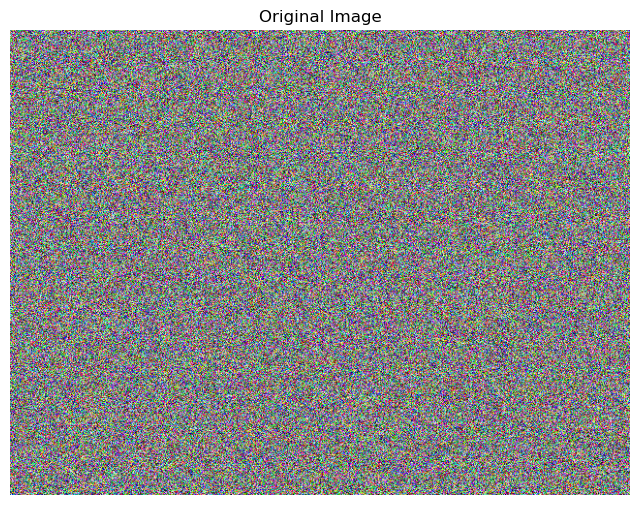

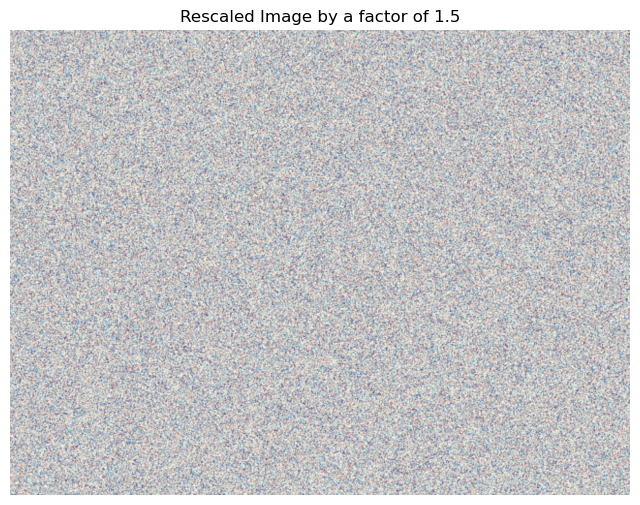

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the image
width, height = 640, 480

# Generate random pixel data
random_image = np.random.rand(height, width, 3)

import matplotlib.pyplot as plt
from skimage.transform import rescale

def scale_image(image, scale_factor):
    """
    Scales an image by a given scale factor, maintaining the aspect ratio.
    The image is displayed before and after resizing for visual comparison.
    
    Parameters:
    image_path (str): The path to the image file to be scaled.
    scale_factor (float): The factor by which the image will be scaled. Values greater than 1 will zoom in, while values less than 1 will zoom out.
    """

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    # Rescale the image, maintaining the aspect ratio
    image_rescaled = rescale(image, scale_factor, anti_aliasing=True)

    # Display the resized image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rescaled)
    plt.title(f"Rescaled Image by a factor of {scale_factor}")
    plt.axis('off')

    # Show both images
    plt.show()

# Example usage:
scale_factor = 1.5  # Scale factor to zoom in
scale_image(random_image, scale_factor)

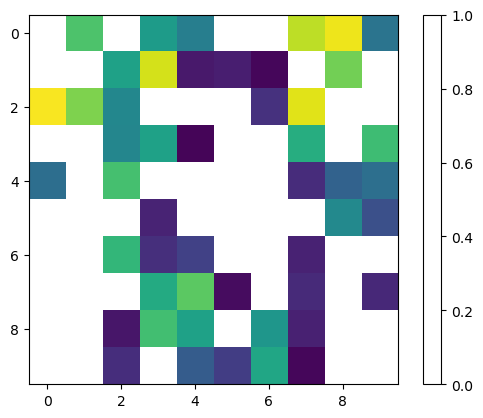

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 创建底图和覆盖层矩阵
np.random.seed(0)
base_matrix = np.random.rand(10, 10)  # 底图为随机值
overlay_matrix = np.random.randint(0, 2, (10, 10))  # 覆盖层为0或1

# 创建一个自定义colormap，其中0值透明，1值白色
cmap = ListedColormap([(0, 0.0, 0.0, 0), 'white'])

# 显示底图
plt.imshow(base_matrix, cmap='viridis')
# 在底图上覆盖第二个矩阵
# 重要的是，我们使用自定义的colormap并设置vmin和vmax以确保正确的颜色映射
plt.imshow(overlay_matrix, cmap=cmap, interpolation='none', vmin=0, vmax=1)

# 显示底图的colorbar
plt.colorbar()

# 显示图像
plt.show()

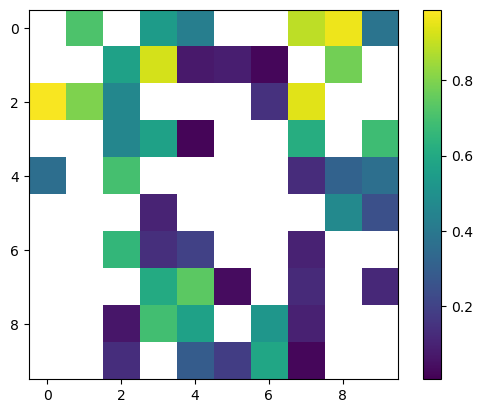

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 创建底图和覆盖层矩阵
np.random.seed(0)
base_matrix = np.random.rand(10, 10)  # 底图为随机值
overlay_matrix = np.random.randint(0, 2, (10, 10))  # 覆盖层为0或1

# 创建一个自定义colormap，其中0值透明，1值白色
cmap = ListedColormap([(0.0, 0.0, 0.0, 0.0), 'white'])

# 创建figure和axis实例
fig, ax = plt.subplots()

# 显示底图
im = ax.imshow(base_matrix, cmap='viridis')

# 显示覆盖层
# 使用自定义colormap，且让0值完全透明，1值为白色
def mask(input_ax, input_mask, input_cmap):
    input_ax.imshow(input_mask, cmap=cmap)

mask(ax, overlay_matrix, cmap)
# 添加colorbar，使用底图的数据
fig.colorbar(im, ax=ax)

# 显示图像
plt.show()

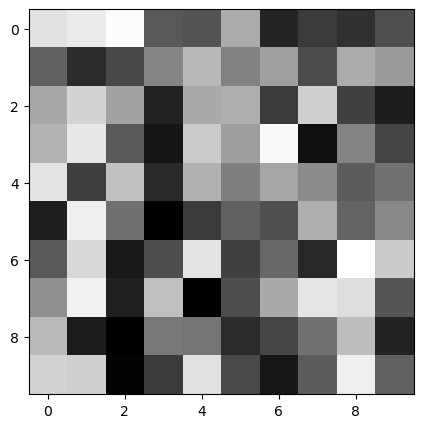

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个示例图像
image = np.random.rand(10, 10)

# 创建一个figure和一个axes
fig, ax = plt.subplots()
ax.imshow(image, cmap="gray")

# 存储点的信息
points = []


# 点击事件的回调函数
def onclick(event):
    global points
    # 点的显示大小为图像宽度的一小部分
    display_size = min(*fig.get_size_inches()) * fig.dpi / 50
    # 存储点的位置和大小
    points.append((event.xdata, event.ydata, display_size))
    # 绘制点
    ax.plot(event.xdata, event.ydata, "o", color="red", markersize=display_size)
    fig.canvas.draw()


# 窗口大小调整的回调函数
def onresize(event):
    # 清除之前的点
    ax.cla()
    # 重新显示图像
    ax.imshow(image, cmap="gray")
    # 重新计算和绘制所有点
    new_display_size = min(*fig.get_size_inches()) * fig.dpi / 50
    for x, y, _ in points:
        ax.plot(x, y, "o", color="red", markersize=new_display_size)
    fig.canvas.draw()


# 连接事件处理函数
fig.canvas.mpl_connect("button_press_event", onclick)
fig.canvas.mpl_connect("resize_event", onresize)

# 显示图像
plt.show()
